# Plotting Exercises, Part 2

## Wealth and Democracy

Let's now pivot from working with example data to real data. Load the World Development Indicator data you worked with over the summer. This is country-level data that includes information on both countries' GDP per capita (a measure of wealth) and the Polity IV scores (a measure of how democratic a country is -- countries with higher scores are liberal democracies, countries with low scores are autocratic.). Use the code below to download the data. 

In [1]:
import pandas as pd
import numpy as np
import warnings

pd.set_option("mode.copy_on_write", True)
warnings.simplefilter(action="ignore", category=FutureWarning)

wdi = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/world-small.csv"
)

Your data should look like this: 

In [2]:
wdi.head()

,country,region,gdppcap08,polityIV
0,Albania,C&E Europe,7715,17.8
1,Algeria,Africa,8033,10.0
2,Angola,Africa,5899,8.0
3,Argentina,S. America,14333,18.0
4,Armenia,C&E Europe,6070,15.0


### Exercise 1

Let's being analyzing this data by estimating a simple linear model ("ordinary least squares") of the relationship between GDP per capita (`gdppcap08`) and democracy scores (`polityIV`). We will do so using the `statsmodel` package, which we'll discuss in detail later is this course. For the momement, just use this code:

```python
import statsmodels.formula.api as smf
results = smf.ols('polityIV ~ gdppcap08',
                   data=wdi).fit()
print(results.summary())
```


In [3]:
import statsmodels.formula.api as smf

results = smf.ols("polityIV ~ gdppcap08", data=wdi).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               polityIV   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.981
Date:                Thu, 26 Oct 2023   Prob (F-statistic):            0.00915
Time:                        04:22:18   Log-Likelihood:                -475.14
No. Observations:                 145   AIC:                             954.3
Df Residuals:                     143   BIC:                             960.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1354      0.721     16.841      0.0

### Exercise 2

Based on the results of this analysis, what would you conclude about about the relationship between `gdppcap08` and `polityIV`? 

(If you aren't familiar with Linear Models and aren't sure how to interprete this, you can also just look at the simple correlation between these two variables using `wdi[['polityIV', 'gdppcap08']].corr()`.)

Write down your conclusions. 

In [4]:
wdi[["polityIV", "gdppcap08"]].corr()

,polityIV,gdppcap08
polityIV,1.000000,0.215749
gdppcap08,0.215749,1.000000


## Observations:
Based on the results of the Linear Regression Model and the Correlation Matrix, The `GDP` of a country and its `Polity IV` score seem to be `positively related`, i.e. Polity IV score increases with the increase in GDP. As per the Linear Regression model, The Polity IV score increases by 9.6x10<sup>-5</sup> units for a unit increase in the GDP of a country. The relationship between the 2 variables is statistically significant since the p value is less than 0.05.

### Exercise 3

Now let's plot the relationship you just estimated statistically. First, use seaborn to create a scatter plot of `polityIV` and `gdppcap08`. Include a title and label your axes (with formatted words, not variable names).

In [5]:
# Import the Required Packages
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

Text(0.5, 1.0, 'Polity IV Score vs. GDP per Capita')

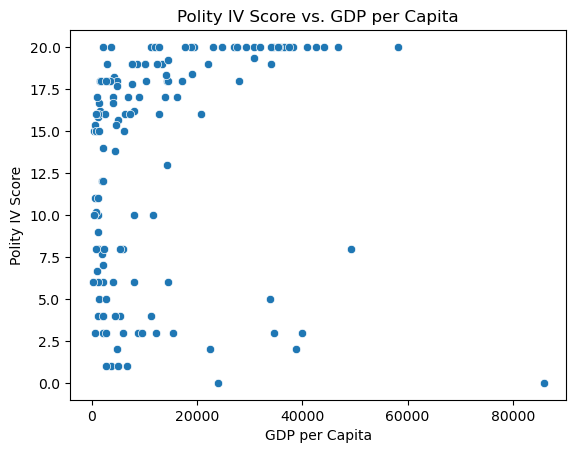

In [6]:
# plot the relation between Polity score and GDP
sns.scatterplot(data=wdi, x="gdppcap08", y="polityIV")
plt.ylabel("Polity IV Score")
plt.xlabel("GDP per Capita")
plt.title("Polity IV Score vs. GDP per Capita")

### Exercise 4

Now add a linear regression (*not* a higher order polynomial, just linear) fit to the scatter plot.

Text(0.5, 1.0, 'Polity IV Score vs. GDP per Capita')

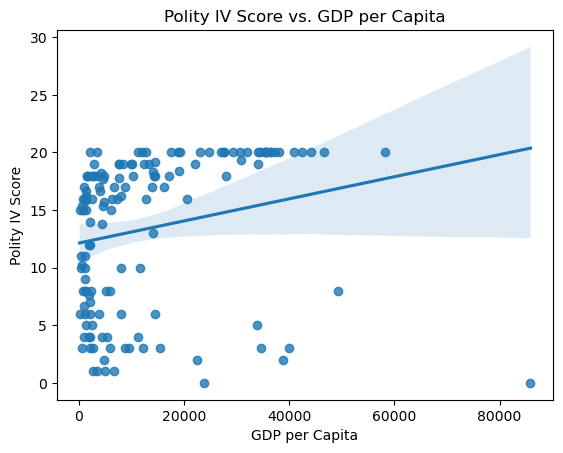

In [7]:
# Create Linear Regression Line
sns.regplot(x="gdppcap08", y="polityIV", data=wdi, scatter=True)
plt.ylabel("Polity IV Score")
plt.xlabel("GDP per Capita")
plt.title("Polity IV Score vs. GDP per Capita")

### Exercise 5

Does it seem like the linear model you estimated fits the data well?

## Observations

The Linear model `Does Not` fit the model well, The line is more skewed towards the upper regions and does not capture the outliers.

### Exercise 6

Linear models impose a very strict functional form on the model they use: they try to draw a straight line through the data, no matter what. 

Can you think of a transform for your data that would make the data a little more sane?

Apply the transformation.

Text(0.5, 1.0, 'Polity IV Score vs. Log GDP per Capita')

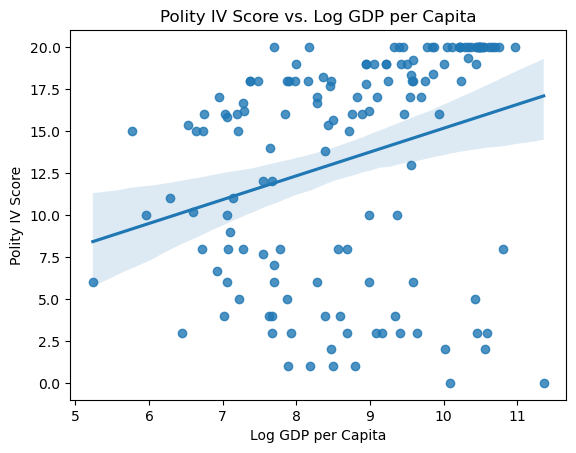

In [8]:
# performing log transformation on the GDP
wdi["log_gdp"] = np.log(wdi["gdppcap08"])

# plotting relationship between Polity IV and Log-GDP
sns.regplot(x="log_gdp", y="polityIV", data=wdi, scatter=True)
plt.ylabel("Polity IV Score")
plt.xlabel("Log GDP per Capita")
plt.title("Polity IV Score vs. Log GDP per Capita")

### Exercise 7

Once you've applied that transformation, let's re-fit our model. 

Rather than imposing linearity this time, however, let's fit a model with a flexible functional form. Using the recipe for a [lowess regression you can find here](https://nickeubank.github.io/practicaldatascience_book/notebooks/class_5/week_2/20_plotting_with_seaborn.html#a-little-bonus), see how well a lowess regression fits your updated data. This is a form of local polynomial regression that is designed to be flexible in how it fits the data. 

Text(0.5, 1.0, 'Polity IV Score vs. Log GDP per Capita')

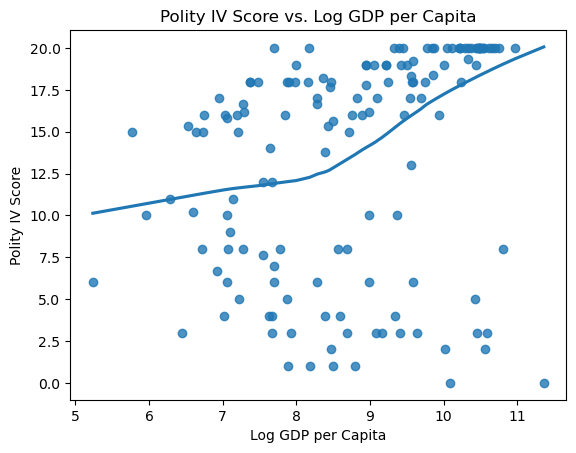

In [9]:
# Plot relation and Lowess Regrssion Line
sns.regplot(x="log_gdp", y="polityIV", data=wdi, scatter=True, lowess=True)
plt.ylabel("Polity IV Score")
plt.xlabel("Log GDP per Capita")
plt.title("Polity IV Score vs. Log GDP per Capita")

### Exercise 8

This does seem to fit the data better, but there seem to be quite a few outliers in the bottom right. Who is that? Add text labels to the points on your graph with country names. Make sure the size of your text labels leaves them legible.

In [10]:
# Define a new column in the DF which labels the countries of interest and blank for others
wdi["outlier_country"] = np.where(
    (wdi["log_gdp"] >= 10) & (wdi["polityIV"] <= 5), wdi["country"], ""
)

500

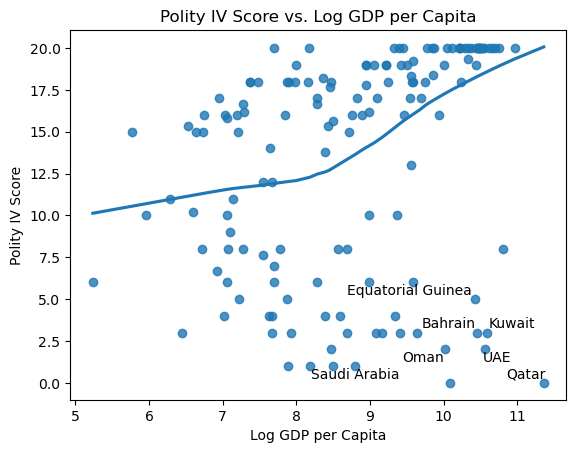

In [11]:
ax = sns.regplot(x="log_gdp", y="polityIV", data=wdi, scatter=True, lowess=True)
plt.ylabel("Polity IV Score")
plt.xlabel("Log GDP per Capita")
plt.title("Polity IV Score vs. Log GDP per Capita")

texts = []
for i, point in wdi[wdi["outlier_country"] != ""].iterrows():
    texts.append(ax.text(point["log_gdp"], point["polityIV"], point["outlier_country"]))
adjust_text(texts)

### Exercise 9

Interesting. It seems that there's are a lot of rich, undemocratic countries that all have something in common: they're oil-rich, small, Middle Eastern countries.

Let's see what happens if we exclude the ten countries with the highest per-capita oil production from our data: Qatar, Kuwait, Equatorial Guinea, United Arab Emirates, Norway, Saudi Arabia, Libya, Oman, Gabon, and Angola. (Note this was in 2007, and excludes very small countries!) 

What does the relationship between Polity and GDP per capita look like for non-natural resource producers?

In [12]:
exclude_list = [
    "Qatar",
    "Kuwait",
    "Equatorial Guinea",
    "UAE",  # Was Changed from United Arab Emirates to UAE since wdi data has it as UAE
    "Norway",
    "Saudi Arabia",
    "Libya",
    "Oman",
    "Gabon",
    "Angola",
]

# Define a new column in the DF which labels the countries of interest and blank for others
wdi["oil_rich_country"] = np.where(wdi["country"].isin(exclude_list), True, False)

/Users/revanth/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Polity IV Score vs. Log GDP per Capita for Non Oil Rich Countries')

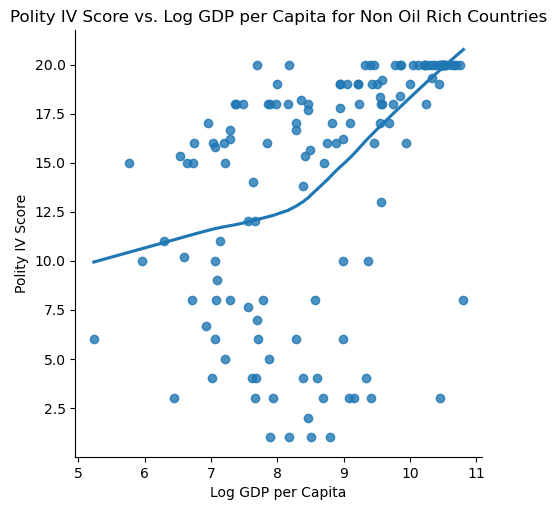

In [13]:
# plot relation between Polity IV and GDP for non Oil-Rich countries
sns.lmplot(
    y="polityIV",
    x="log_gdp",
    data=wdi[wdi["oil_rich_country"] == False],
    scatter=True,
    lowess=True,
)
plt.ylabel("Polity IV Score")
plt.xlabel("Log GDP per Capita")
plt.title("Polity IV Score vs. Log GDP per Capita for Non Oil Rich Countries")

### Exercise 10

Let's make sure that you accurately identified all 10 of the oil producers. Write a line of code to count up how many big producers you have identified. If you do not get 10, can you figure out what you did wrong?

In [14]:
print(
    f"""{wdi[wdi["country"].isin(exclude_list)].shape[0]}/10 countires have been identified"""
)

10/10 countires have been identified


### Exercise 11

How does the relationship between GDP per capita and Polity look for the oil producers we dropped above?

(note a Lowess line may not plot if you don't have enough data)

/Users/revanth/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Polity IV Score vs. Log GDP per Capita for Oil Rich Countries')

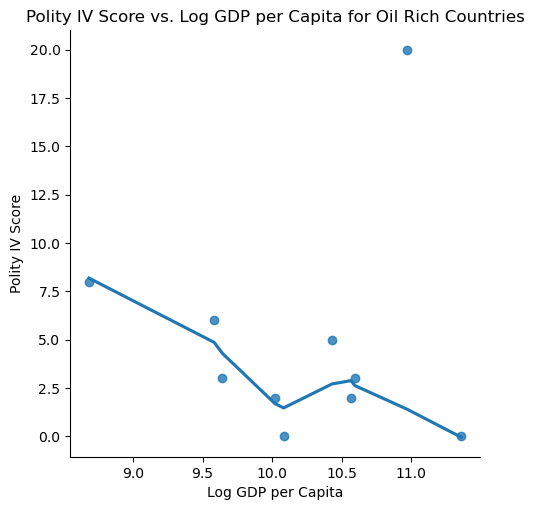

In [15]:
# plot relation between Polity IV and GDP for Oil-Rich countries
ax1 = sns.lmplot(
    y="polityIV",
    x="log_gdp",
    data=wdi[wdi["oil_rich_country"] == True],
    scatter=True,
    lowess=True,
)
plt.ylabel("Polity IV Score")
plt.xlabel("Log GDP per Capita")
plt.title("Polity IV Score vs. Log GDP per Capita for Oil Rich Countries")

### Exercise 12

Look back to your answer for Exercise 2. Do you still believe the result of your linear model? What did you learn from plotting. Write down your answers with your partner. 

## Observations
After looking at the graphs, The linear model results from earlier don't seem to be accurate as they do not capture the trend which is observed for the "Oil Rich" countries where their Polity IV score is generally decreasing with an increase in the GDP. This trend was probably not captured since only a few countries in this dataset fall under this category.

### Exercise 13

Finally, let's make a plot that color codes countries by whether they are big oil producers. Include separate linear regression fits for both groups.

/Users/revanth/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


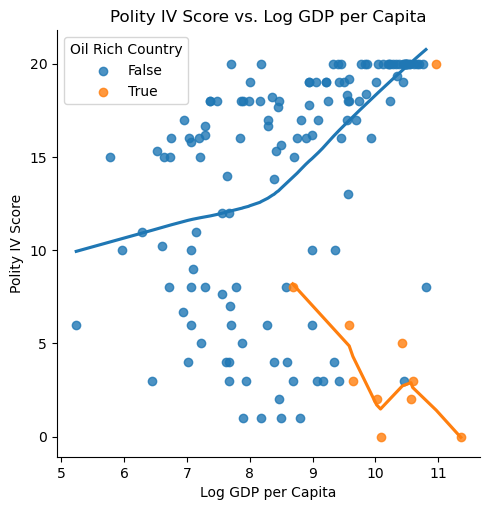

In [16]:
# Plot a graph to compare Polity IV and GDP, separated by the country being Oil rich or not
ax = sns.lmplot(
    y="polityIV",
    x="log_gdp",
    data=wdi,
    scatter=True,
    lowess=True,
    hue="oil_rich_country",
    legend=False,
)
plt.ylabel("Polity IV Score")
plt.xlabel("Log GDP per Capita")
plt.title("Polity IV Score vs. Log GDP per Capita")
plt.legend(title="Oil Rich Country", loc="upper left")

## Take-aways

One of our main jobs as data scientists is to *summarize* data. In fact, its such an obvious part of our jobs we often don't think about it very much. In reality, however, this is one of the most difficult things we do. 

Summarization means taking rich, complex data and trying to tell readers about what is going on in that data using simple statistics. In the process of summarization, therefore, we must necessarily throw away much of the richness of the original data. When done well, this simplification makes data easier to understand, but only if we throw away the *right* data. You can *always* calulate the average value of a variable, or fit a linear model, but whether doing so generates a summary statistic that properly represents the essence of the data being studied depends on the data itself. 

Plotting is one fo the best tools we have as data scientists for evaluating whether we are throwing away the *right* data. As we learned from Part 1 of this exercise, just looking at means and standard deviations can mask tremendous variation. Each of our example datasets looked the same when we examined our summary statistics, but they were all radically different when plotted. 

Similarly, a simple linear model would "tell" us that if GDP per capita increases by \$10,000, we would expect Polity scores to increase by about 1 (i.e. the coefficent on the linear model was 9.602e-05). But when we plot the data, not only can we that the data is definitely *not* linear (and so that slope doesn't really mean anything), but we can also see that oil producing countries seem to defy the overall trend, and so should maybe be studied separately. 

Moreover, we can see that if we just look at oil producers, there is no clear story: some are rich and democratic, while others are rich and autocratic (indeed, [this observation is the foundation of some great research on the political consequences of resource wealth](https://www.jstor.org/stable/41480824)!)

So remember this: tools for summarizing data will always give you an answer, but it's up to you as a data scientist to make sure that the summaries you pass on to other people properly represent the data you're using. And there is perhaps no better way to do this than with plotting!



## Overlaying Data Series with matplotlib

In our last plotting exercises, you were asked to make a paired plot in which different data series were plotted next to one another with a shared x-axis. Presumably that resulted in a figure that looked something like this:

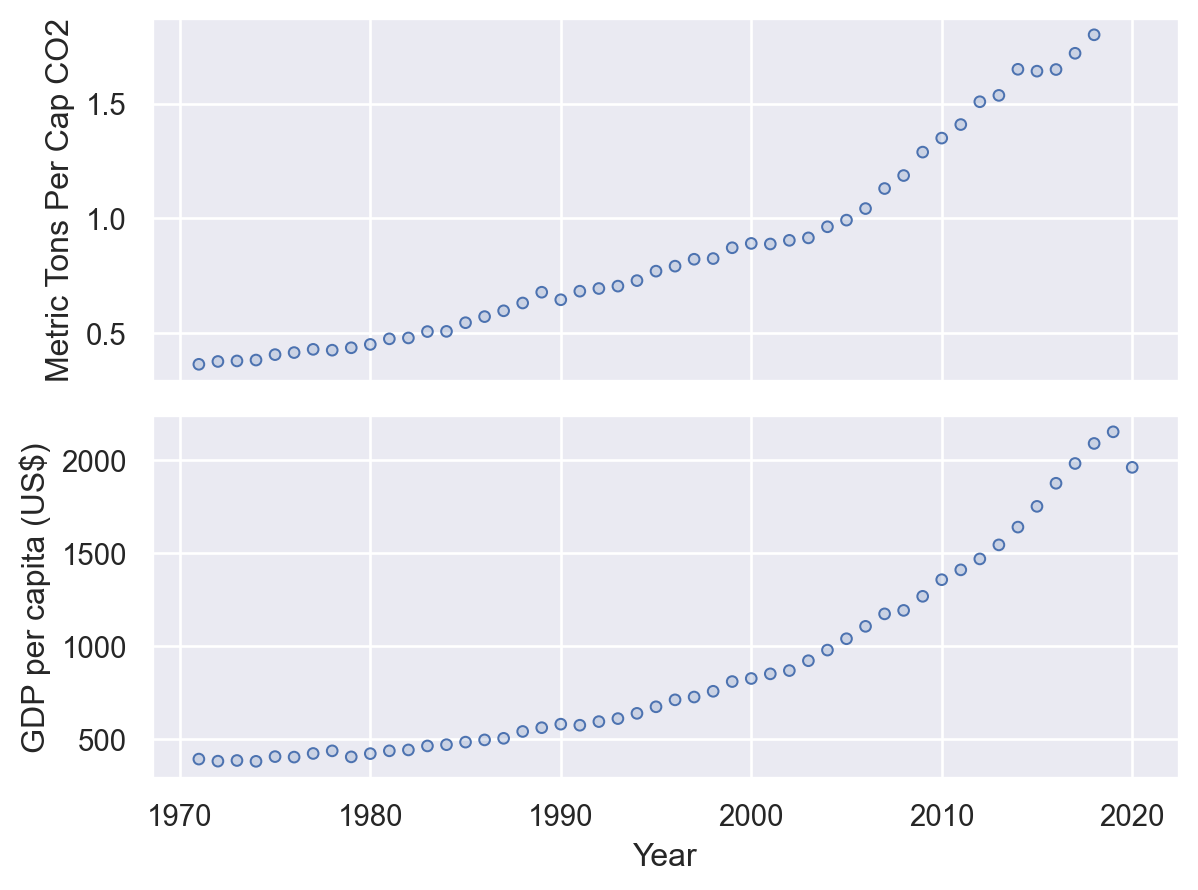

In [17]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

import seaborn.objects as so
from matplotlib import style
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

wdi = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/wdi_plotting.csv"
)

india = wdi[wdi["Country Name"] == "India"]

india = india.rename(
    columns={
        "CO2 emissions (metric tons per capita)": "Metric Tons Per Cap CO2",
        "GDP per capita (constant 2010 US$)": "GDP per capita (US$)",
    }
)
p = (
    so.Plot(
        india,
        x="Year",
    )
    .add(so.Dots())
    .pair(
        y=[
            "Metric Tons Per Cap CO2",
            "GDP per capita (US$)",
        ]
    )
)
p

Often times, however, it's more interesting to directly overlay data series on the same plot to make a figure like this:

![two series sample plot](images/two_series_overlay.png)

So let's do that here!

### Exercise 14

Making this work will require two new tricks: 

- using the `.twinx()` method from matplotlib, and 
- suing the `.on()` method from seaborn.objects.

How? Great question! I'm going to leave it to you to figure that out using the documentation for these methods. But here's a start — you can find the `.on()` [method for seaborn.objects here](https://seaborn.pydata.org/generated/seaborn.objects.Plot.on.html), and the `.twinx()` for matplotlib [method demonstrated here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py)

Oh, and you may note use these two variables as your two. :) 

Good luck! 

Also, if you want to, feel free to add any extra bells and whistles as part of your exploration (like a legend, or colored y-axis labels).

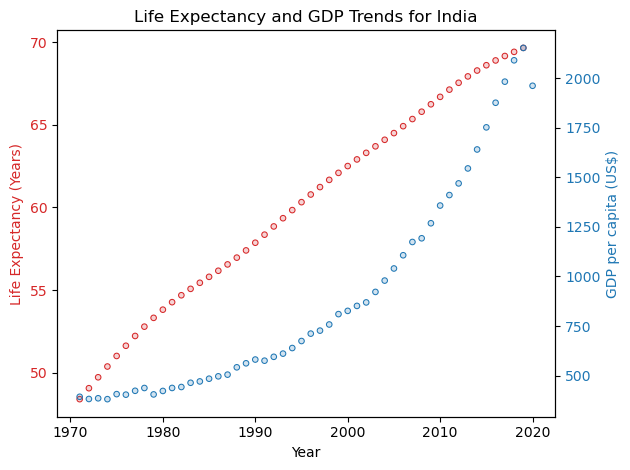

In [18]:
fig, ax1 = plt.subplots()

color = "tab:red"
q = so.Plot(india, x="Year", y="Life expectancy at birth, total (years)").add(
    so.Dots(color=color)
)
q.on(ax1).plot()
ax1.set_ylabel("Life Expectancy (Years)", color=color)
ax1.tick_params(axis="y", labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = "tab:blue"
q2 = so.Plot(india, x="Year", y="GDP per capita (US$)").add(so.Dots(color=color))
q2.on(ax2).plot()
ax2.set_ylabel("GDP per capita (US$)", color=color)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Life Expectancy and GDP Trends for India")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()